# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.lines
import numpy as np
import seaborn as sns


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<?, ?it/s]


# Methods

In [5]:
df_z_t = None
df_z_f = None


In [6]:
def plot_stages(df_z_t, df_z_f):
    dataframe = data_preprocessor.load_processed_incidents_dataframe()

    initial_count = dataframe.shape[0]

    stages = ["Initial"]
    counts = [initial_count]
    triage_proportions = []
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    # record stages
    dataframe = data_preprocessor._remove_duplicates(dataframe)
    stages.append("Duplicates")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_incomplete_years(dataframe)
    stages.append("Incomplete Years")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_outside_region(dataframe)
    stages.append("Out-of-Region")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_other_resource_types(dataframe)
    dataframe = data_preprocessor._count_resources_sent(dataframe)
    stages.append("Other Resources")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_extra_resources(dataframe)
    stages.append("Aiding Resources")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)
    stages.append("V2/V Impressions")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)
    dataframe = data_preprocessor._fix_timestamps(dataframe)
    stages.append("Timestamp Errors")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    dataframe = data_preprocessor._remove_na(dataframe)
    stages.append("Remove N/A")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    df_z_f = dataframe.copy(True)
    dataframe = data_preprocessor._remove_outliers(dataframe)
    df_z_t = dataframe.copy(True)
    stages.append("Outliers")
    counts.append(dataframe.shape[0])
    triage_proportions.append(
        dataframe["triage_impression_during_call"].value_counts(normalize=True).to_dict()
    )

    proportions_updated = {
        "A": [],
        "H": [],
        "V1": [],
        "V2": [],
        #"V": [],
    }

    total_counts = counts

    for key, _ in proportions_updated.items():
        for index, _ in enumerate(stages):
            if key not in triage_proportions[index]:
                proportions_updated[key].append(np.nan)
            else:
                proportions_updated[key].append(triage_proportions[index][key] * 100)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot proportions for all categories, including V2 and V, with correction for NaN handling
    colors = sns.color_palette("tab10", n_colors=5)
    for i, (triage, values) in enumerate(proportions_updated.items()):
        # Handling the None values for V2 and V in the later stages by converting them to np.nan
        values_with_nan = [value if value is not None else np.nan for value in values]
        ax1.plot(stages, values_with_nan, label=triage, color=colors[i], marker='o')

    ax1.set_ylabel('Proportion (%)', color='black')
    ax1.set_ylim(0, 100 * 1.05)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_xticklabels(stages, rotation=45, ha="right")
    ax1.grid(True)

    # Twin Axes for total count
    ax2 = ax1.twinx()
    ax2.plot(stages, total_counts, label='Total Count', color='black', linestyle='--', marker='x')
    ax2.set_ylim(0, total_counts[0] * 1.05)
    ax2.set_ylabel('Total Incidents', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', title='Triage Category & Total Count')

    fig.tight_layout()

    plt.title('Triage Category Distribution and Incident Count Across Data Pipeline Stages', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)

    plt.savefig('./plots/pipeline_stages.png', dpi=300, bbox_inches='tight')

    plt.show()

    return df_z_t, df_z_f


# Main

c:\Users\sindr\Documents\Projects\Emergency-Optimizers\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sindr\AppData\Local\Temp\ipykernel_21620\373840219.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stages, rotation=45, ha="right")


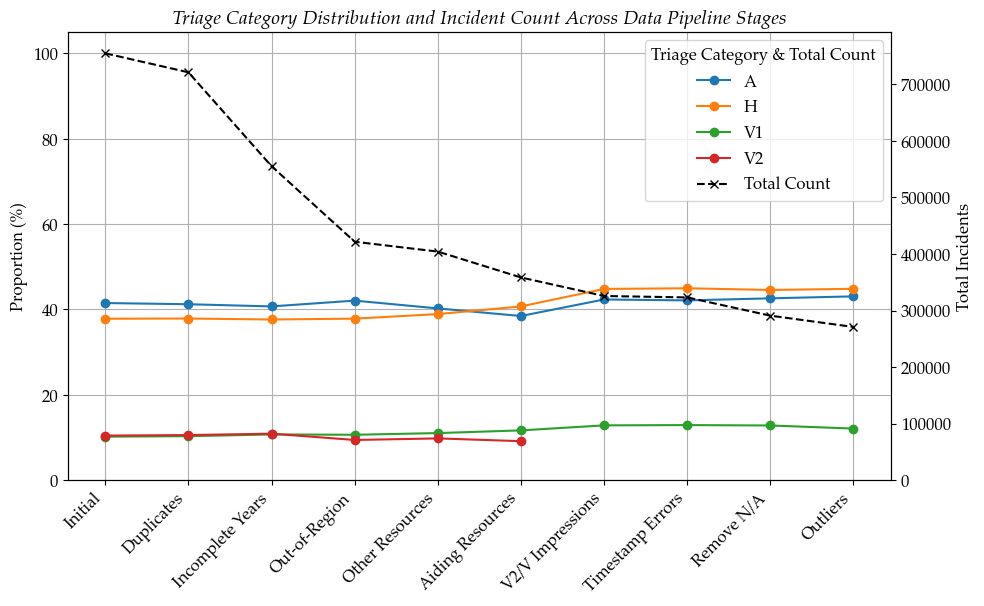

In [7]:
df_z_t, df_z_f = plot_stages(df_z_t, df_z_f)


In [11]:
dataframe = data_preprocessor.load_enhanced_incidents_dataframe()

dataframe["triage_impression_during_call"].value_counts(normalize=True)


triage_impression_during_call
H     0.448365
A     0.430683
V1    0.120953
Name: proportion, dtype: float64

In [ ]:
# extract date from time_call_received
dataframe["day_of_year"] = dataframe["time_call_received"].dt.day_of_year

# group data by day of the year and sum across each group to account for multiple rows per day
grouped_data = dataframe.groupby("day_of_year").agg({f"total_{incident_type}_incidents_hour_{hour}": 'last' for incident_type in ['A', 'H', 'V1'] for hour in range(0, 24)})

# Sum total incidents across the specified hours for each day
grouped_data["total_incidents"] = grouped_data.sum(axis=1)
